# Logistic Regression

* when $y \in \{0,1\}$, then left-hand side becomes $E[y|x] = Pr\{y=1|x\}$
* linear probability model: $Pr\{y=1|x\} = x'\beta$
* Pr\{y=1|x\} not necessarily bounded between 0 and 1 as $x'\beta$ moves from $- \infty$ to $\infty$
* put 'index' $x\beta$ inside standard logistic function $\Lambda(u) = [1+exp(-u)]^{-1}$ and set $Pr\{y=1|x\} = \Lambda(x'\beta)$

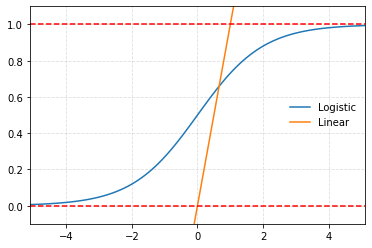

In [3]:
import matplotlib.pyplot as plt
import numpy as np

axes = plt.gca() # get current axes, create it
axes.set_xlim([-5.1,5.1])
axes.set_ylim([-.1, 1.1])

u = np.linspace(-5.1,5.1,100,endpoint=True)
plt.plot(u,1/(1+np.exp(-u)),label='Logistic')
plt.plot(u,u,label='Linear')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend(framealpha=0.0)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid

* logistic function helps interpretability and allows all fitted values to lie between 0 and 1 

simple manipulations show that

\begin{align*}
    Pr\{y=1|x\} = \Lambda(x'\beta) = \frac{1}{1 + exp(-x\beta)} = \frac{exp(x'\beta)}{1 + exp(x'\beta)} \\
    1 - Pr\{y=1|x\} = \frac{1}{1 + exp(x'\beta)} \\
    \frac{Pr\{y=1|x\}}{1-Pr\{y=1|x\}} = exp(x'\beta) \\
    log(\frac{Pr\{y=1|x\}}{1-Pr\{y=1|x\}}) = x'\beta
\end{align*}

* if we def $Pr\{y=1|x\} = p(x)$ as the probability of success, then $\frac{p(x)}{1-p(x)}$ := odds
* can take any value between 0 and $\infty$
* log of the odds := log-odds, or logit

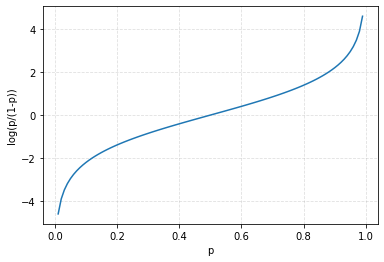

In [6]:
p = np.linspace(0.01,0.99,100,endpoint=True)
plt.plot(p,np.log(p/(1-p)))
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.grid(alpha=.4,linestyle='--') #Adding a grid

* ex: if $p(x)=0.8$, then the odds equal $\frac{0.8}{1-0.8} = 4$; then say the odds of success is 4 to 1
* parameter $\beta_j$ represents how an increase of one unit of $x_j$ on average changes the log-odds, or equivalently $exp(\beta_j)$ represents how an increase of one unit of $x_j$ on average changes the odds

going to model female labor force participation decision based on various household characteristics

In [14]:
import pandas as pd

# import dataset and view 
df = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta')
df.head()

# list of variables to demean
variables = ["kidslt6", "kidsge6", "age", "educ","exper", "hushrs", "husage", "huseduc","huswage","nwifeinc","mtr","unem"]

# add demeaned variables
for x in variables:
    df[x+'_dmean'] = df[x] - df[x].mean(skipna = True)

# show columns
df.columns

Index(['inlf', 'hours', 'kidslt6', 'kidsge6', 'age', 'educ', 'wage', 'repwage',
       'hushrs', 'husage', 'huseduc', 'huswage', 'faminc', 'mtr', 'motheduc',
       'fatheduc', 'unem', 'city', 'exper', 'nwifeinc', 'lwage', 'expersq',
       'kidslt6_dmean', 'kidsge6_dmean', 'age_dmean', 'educ_dmean',
       'exper_dmean', 'hushrs_dmean', 'husage_dmean', 'huseduc_dmean',
       'huswage_dmean', 'nwifeinc_dmean', 'mtr_dmean', 'unem_dmean'],
      dtype='object')

In [16]:
# create interaction terms
interact = []
for x in range(len(variables)):
    for y in variables[x+1:]:
        if x != y:
            interact.append('(' + variables[x] + '_dmean*' + y + '_dmean' + ')')

# print interactions
interact

['(kidslt6_dmean*kidsge6_dmean)',
 '(kidslt6_dmean*age_dmean)',
 '(kidslt6_dmean*educ_dmean)',
 '(kidslt6_dmean*exper_dmean)',
 '(kidslt6_dmean*hushrs_dmean)',
 '(kidslt6_dmean*husage_dmean)',
 '(kidslt6_dmean*huseduc_dmean)',
 '(kidslt6_dmean*huswage_dmean)',
 '(kidslt6_dmean*nwifeinc_dmean)',
 '(kidslt6_dmean*mtr_dmean)',
 '(kidslt6_dmean*unem_dmean)',
 '(kidsge6_dmean*age_dmean)',
 '(kidsge6_dmean*educ_dmean)',
 '(kidsge6_dmean*exper_dmean)',
 '(kidsge6_dmean*hushrs_dmean)',
 '(kidsge6_dmean*husage_dmean)',
 '(kidsge6_dmean*huseduc_dmean)',
 '(kidsge6_dmean*huswage_dmean)',
 '(kidsge6_dmean*nwifeinc_dmean)',
 '(kidsge6_dmean*mtr_dmean)',
 '(kidsge6_dmean*unem_dmean)',
 '(age_dmean*educ_dmean)',
 '(age_dmean*exper_dmean)',
 '(age_dmean*hushrs_dmean)',
 '(age_dmean*husage_dmean)',
 '(age_dmean*huseduc_dmean)',
 '(age_dmean*huswage_dmean)',
 '(age_dmean*nwifeinc_dmean)',
 '(age_dmean*mtr_dmean)',
 '(age_dmean*unem_dmean)',
 '(educ_dmean*exper_dmean)',
 '(educ_dmean*hushrs_dmean)',
 '(e

In [19]:
# create specifications
f1 = 'inlf ~ -1 + city + ' + ' + '.join([x for x in variables])
f2 = f1 + ' + ' + ' + '.join([x for x in interact]) + ' - ' + ' - '.join([x+'_dmean' for x in variables])

# print specifications
print(f1)
print(f2)

inlf ~ -1 + city + kidslt6 + kidsge6 + age + educ + exper + hushrs + husage + huseduc + huswage + nwifeinc + mtr + unem
inlf ~ -1 + city + kidslt6 + kidsge6 + age + educ + exper + hushrs + husage + huseduc + huswage + nwifeinc + mtr + unem + (kidslt6_dmean*kidsge6_dmean) + (kidslt6_dmean*age_dmean) + (kidslt6_dmean*educ_dmean) + (kidslt6_dmean*exper_dmean) + (kidslt6_dmean*hushrs_dmean) + (kidslt6_dmean*husage_dmean) + (kidslt6_dmean*huseduc_dmean) + (kidslt6_dmean*huswage_dmean) + (kidslt6_dmean*nwifeinc_dmean) + (kidslt6_dmean*mtr_dmean) + (kidslt6_dmean*unem_dmean) + (kidsge6_dmean*age_dmean) + (kidsge6_dmean*educ_dmean) + (kidsge6_dmean*exper_dmean) + (kidsge6_dmean*hushrs_dmean) + (kidsge6_dmean*husage_dmean) + (kidsge6_dmean*huseduc_dmean) + (kidsge6_dmean*huswage_dmean) + (kidsge6_dmean*nwifeinc_dmean) + (kidsge6_dmean*mtr_dmean) + (kidsge6_dmean*unem_dmean) + (age_dmean*educ_dmean) + (age_dmean*exper_dmean) + (age_dmean*hushrs_dmean) + (age_dmean*husage_dmean) + (age_dmean*huse

In [20]:
import patsy

# create design matrices for specifications
y1, X1 = patsy.dmatrices(f1, data=df, return_type='dataframe')
y2, X2 = patsy.dmatrices(f2, data=df, return_type='dataframe')

In [23]:
# partition dataset into train and test datasets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=3)

# print response variable for the training set
print(y2_train)

inlf
356   1.0
549   0.0
591   0.0
417   1.0
215   1.0
..    ...
659   0.0
256   1.0
643   0.0
249   1.0
664   0.0

[564 rows x 1 columns]


## estimating the regression coefficients

* want to observe the joint probability of observing the y2_train vector
* if we have a random sample, then the joint probability of observing the sequence of n ones and zeroes above is given by

\begin{align*}
    p(x_1) * (1-p(x_2)) * (1-p(x_3)) * p(x_4) * p(x_5) = \\
    \Pi_{i=1}^n p(x_i)^{y_i} (1-p(x_i))^{1-y_i} = \\
    \Pi_{i=1}^n \Lambda (x_i)^{y_i} (1-\Lambda (x_i))^{1-y_i} = \\
    L(\beta | y_1, \dots ,y_n; x_1, \dots, x_n) =: L_n(\beta)
\end{align*}

* $L_n(\beta)$: likelihood function
* take natural log: $ln(\beta) = ln(L_n(\beta))$ -  called log-likelihood function
* can estimate $\beta$ by maximizing the log-likelihood function; equivalent to finding the $\beta$ that maximizes the joint probability to observe the sample we have
* i.e $\hat{\beta} = argmax(L_n(b))$

In [32]:
# estimate the base model
from sklearn.linear_model import LogisticRegression

# do logistical regression
logit1 = LogisticRegression(fit_intercept=True, max_iter=1000, solver='lbfgs', penalty='none').fit(X1, y1.values.ravel())

# take exponential of log coefficients
exp_coef = np.exp(logit1.coef_)

# print the coefficients of the variables
pd.Series(exp_coef.transpose(1,0).tolist(), index = X1_train.columns)

city        [1.0422775985955426]
kidslt6     [0.2637376077729548]
kidsge6     [1.1351754926551507]
age         [0.9287073869891453]
educ        [1.3501386813885938]
exper       [1.1267483276092163]
hushrs      [0.9997966754950551]
husage      [1.0019754462574886]
huseduc     [0.9761749979026848]
huswage     [0.9784697847507265]
nwifeinc    [0.9861639407616033]
mtr          [0.825631577742942]
unem        [0.9844648608090281]
dtype: object

interpretation of the logit coefficients:

* Holding everything else constant, one extra year of educ will make the odds of a woman to be working for wages to be 34.88% higher
* The odds of a woman working for wages in a city is 1.043 times that if she were to live in a rural area (non-SMSA) instead
* Having 1 extra kidslt6 will reduce the odds of a woman to be working for wages by a factor of 0.265.

## Predicted Probabilities

* once you get $\hat{\beta}$ from the training set, we can plug in the features in the validation set and calculate the predicted probabilites to be in the labor force for observations in the validation set
* if the predicted probability for observation $j$ in the validation set is above 0.5, we can predict a 'success' i.e $\hat{y_j} = 1$ and $\hat{y_j} = 0$
* since we do observe the actual outcome for said observation i.e $y_j$ we can count how many times our model predicted the correct outcome

In [33]:
logit1.score(X1_test, y1_test) # gives percentage of values predicted correctly

0.7354497354497355

In [36]:
from sklearn.metrics import confusion_matrix

#
confusion_mat = confusion_matrix(y1_test, logit1.predict(X1_test))

# print the matrix
print(confusion_mat)

[[53 27]
 [23 86]]


## Elastic Net

* assume we are interested in fitting a model with a larger set of features i.e o that contain the initial features in the base model plus all possible cross-products of the demeaned features excluding city
* can implement the elastic net regression as explained before i.e $\hat{\beta} = arg min_b - \mathcal{L}_n(b) + \lambda((1-\alpha)||b||^2_2 + \alpha||b||_1)$

In [38]:
from sklearn.preprocessing import StandardScaler

# standardizes each col of training design matrix 
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.fit_transform(X2_test)

* train model using 5-fold cross-validation on the train data set over a combination of 20 values of $\lambda$ and 10 values of $\alpha$

In [43]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV

# create kfold object
fold = KFold(n_splits=5, random_state=42, shuffle=True)

# find the optimal alpha and lambda using cross validation setup
searchCV = LogisticRegressionCV(
    Cs = list(np.linspace(0.1,2,20,endpoint=True)) #this corresponds to 1/lambda above (reciprocal because of parameter definition)
    ,penalty = 'elasticnet'
    ,l1_ratios = np.linspace(0.1,0.9,10,endpoint=True) #this corresponds to alpha above
    ,scoring = 'accuracy' #proportion of main diag of confusion matrix
    ,cv = fold
    ,random_state = 42
    ,max_iter = 10000
    ,fit_intercept = True
    ,solver = 'saga' #only optimizer available for elasticnet
    ,tol = 10
)

# fit the cross validation logit regression
logit2_cv = searchCV.fit(X2_train, y2_train.values.ravel())

get values of $\hat{\lambda}$ and $\hat{\alpha}$ that maximized the average prediction accuracy in the five validation sets

In [46]:
print(logit2_cv.C_) # value of lambda: ridge penalization

[1.3]


In [47]:
print(logit2_cv.l1_ratio_) # value of alpha: more weight on lasso penalization

[0.72222222]


can also calculate the proportion of true predictions and confusion matrix using the validation data set

In [44]:
logit2_cv.score(X2_test, y2_test)

0.7248677248677249

In [45]:
confusion_matriz = confusion_matrix(y2_test, logit2_cv.predict(X2_test))
print(confusion_matriz)

[[50 30]
 [22 87]]
